### Convert to Binary Image:
Use image processing software (e.g., ImageJ, Python, MATLAB) to threshold the image and create a binary mask where pores are white (1) and the polymer film is black (0).

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

image_path = 'sample2A.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image (thresholding to highlight pores)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the pores
contours = measure.find_contours(binary_image, 0.8)

# Extract centroids of the pores
centroids = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])  # X-coordinate of centroid
        cy = int(M["m01"] / M["m00"])  # Y-coordinate of centroid
        centroids.append((cx, cy))

centroids = np.array(centroids)

In [3]:
print(centroids)

[[0 2]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


 ## Extract Droplet Centroids

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "sample4A.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Use Otsu's thresholding to segment pores
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Detect connected components
num_labels, labels = cv2.connectedComponents(cleaned)

# Compute centroids
centers = []
for label_id in range(1, num_labels):  # Skip label 0 (background)
    mask = (labels == label_id).astype(np.uint8)
    M = cv2.moments(mask, binaryImage=True)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centers.append((cX, cY))

# Convert grayscale to BGR for drawing
marked_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
print(centroids)
plt.imshow(image, cmap='gray')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=5)
plt.title('Detected Droplet Centers')
plt.show()



NameError: name 'centroids' is not defined

[[914 680]
 [539 678]
 [454 673]
 [ 27 673]
 [306 670]
 [113 668]
 [212 651]
 [622 642]
 [844 647]
 [718 620]
 [ 51 605]
 [156 594]
 [277 589]
 [505 591]
 [820 583]
 [392 601]
 [636 548]
 [ 23 519]
 [ 94 511]
 [747 522]
 [902 503]
 [557 479]
 [326 471]
 [451 457]
 [657 442]
 [ 26 399]
 [384 376]
 [563 377]
 [ 73 388]
 [184 432]
 [702 355]
 [850 438]
 [467 347]
 [284 335]
 [819 338]
 [ 86 293]
 [625 294]
 [ 26 284]
 [181 262]
 [393 260]
 [524 247]
 [731 238]
 [627 206]
 [277 212]
 [ 98 194]
 [ 23 182]
 [188 163]
 [358 154]
 [817 194]
 [453 149]
 [682 142]
 [921  92]
 [869 133]
 [579 117]
 [ 62  90]
 [162  81]
 [268  94]
 [392  67]
 [683  54]
 [794  59]
 [483  51]
 [872  55]
 [752  13]
 [662   2]
 [576  32]
 [431   6]
 [317  17]
 [211  24]
 [114  25]
 [ 34  28]]


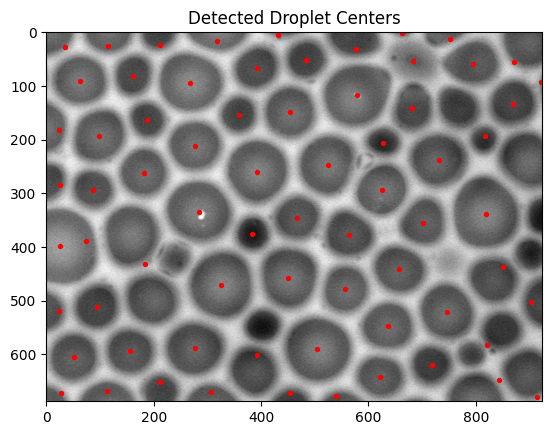

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "sample4A.jpg"  # Update with your image path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply median blur to reduce noise
blurred = cv2.medianBlur(image, 5)

# Use Otsu's thresholding to create a binary mask
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological closing to fill small gaps
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# Detect edges using Canny edge detector
edges = cv2.Canny(closed, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert to color image for visualization
output_final = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw detected pore centers
centroids = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        centroids.append((cx, cy))

# Convert to NumPy array
centroids = np.array(centroids)
print(centroids)
# Step 5: Plot the results
plt.imshow(image, cmap='gray')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=8)
plt.title('Detected Droplet Centers')
plt.show()

[[549 679]
 [456 676]
 [ 14 676]
 [307 674]
 [113 672]
 [213 664]
 [799 664]
 [718 620]
 [403 548]
 [ 14 521]
 [907 503]
 [238 424]
 [899 414]
 [384 376]
 [910 344]
 [ 87 293]
 [ 15 278]
 [628 205]
 [815 200]
 [ 15 179]
 [189 164]
 [358 154]
 [768 142]
 [683 142]
 [162  81]
 [392  67]
 [682  54]
 [484  51]
 [890  31]
 [737  10]
 [664   3]
 [573  20]
 [442   4]
 [320  14]
 [208  14]
 [116  16]
 [ 20  18]]


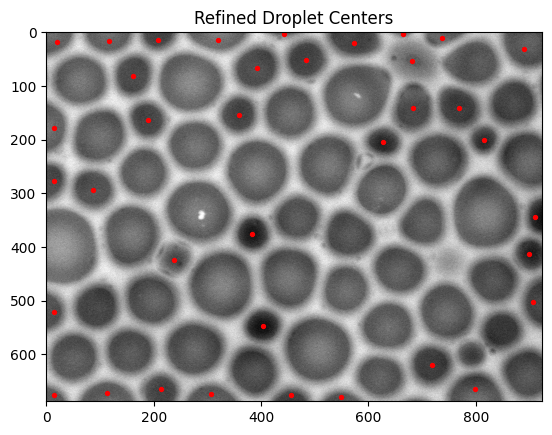

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load SEM Image in Grayscale
image = cv2.imread('sample4A.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Apply Otsu’s Thresholding for better segmentation
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Morphological Operations to refine segmentation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morphed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 4: Find Contours and Filter by Area
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

centroids = []
min_area = 100  # Adjust to remove small noise
max_area = 5000  # Adjust to exclude large non-droplet objects

for contour in contours:
    area = cv2.contourArea(contour)
    if min_area < area < max_area:
        # Use Convex Hull to refine the droplet shape
        hull = cv2.convexHull(contour)
        M = cv2.moments(hull)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            centroids.append([cx, cy])

# Convert to numpy array
centroids = np.array(centroids)
print(centroids)
# Step 5: Plot the results
plt.imshow(image, cmap='gray')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=8)
plt.title('Refined Droplet Centers')
plt.show()


[[163 658]
 [676 654]
 [439 644]
 [808 641]
 [268 641]
 [  8 639]
 [ 81 627]
 [722 608]
 [635 607]
 [166 602]
 [358 603]
 [538 608]
 [232 583]
 [441 576]
 [804 549]
 [591 530]
 [291 529]
 [  6 519]
 [194 510]
 [ 88 517]
 [386 502]
 [692 505]
 [491 487]
 [837 462]
 [785 454]
 [254 441]
 [598 415]
 [ 31 401]
 [149 402]
 [714 385]
 [363 389]
 [814 369]
 [481 368]
 [251 346]
 [571 320]
 [ 76 315]
 [411 301]
 [656 306]
 [758 290]
 [ 14 280]
 [329 285]
 [251 269]
 [174 276]
 [595 250]
 [828 261]
 [496 250]
 [393 216]
 [281 198]
 [ 73 205]
 [810 168]
 [696 192]
 [186 165]
 [568 161]
 [469 139]
 [755 110]
 [250 108]
 [ 18 101]
 [107  95]
 [638  86]
 [356 105]
 [541  60]
 [127  21]
 [ 94  16]
 [814  55]
 [720  39]
 [620  12]
 [508   1]
 [451  37]
 [365  10]
 [279  33]
 [192  41]
 [ 44  21]]


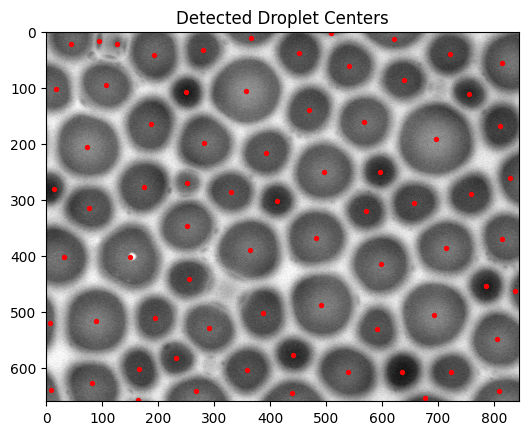

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "sample4B.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw on
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Calculate and draw centroids
centroids = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroids.append((cX, cY))
        cv2.circle(output, (cX, cY), 3, (0, 0, 255), -1)

# Show the output image with centroids

# Convert to NumPy array
centroids = np.array(centroids)
print(centroids)
# Step 5: Plot the results
plt.imshow(image, cmap='gray')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=8)
plt.title('Detected Droplet Centers')
plt.show()


## Perform Voronoi Tessellation

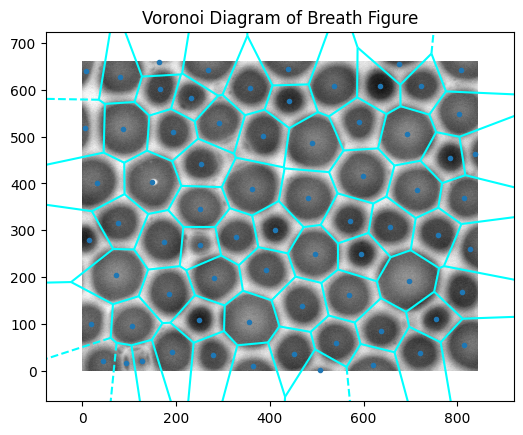

In [12]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Compute Voronoi Tessellation
vor = Voronoi(centroids)

# Plot Voronoi Diagram
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='cyan', line_width=1.5)
plt.title('Voronoi Diagram of Breath Figure')
plt.show()


## Analyze Voronoi Cell Shapes

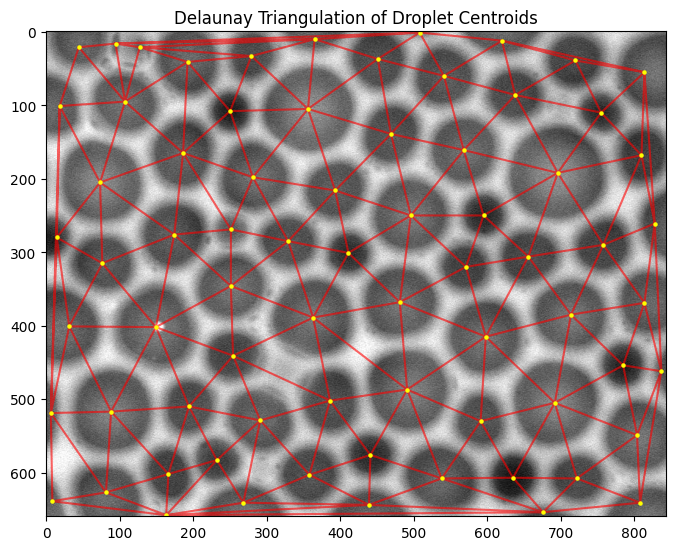

In [13]:
import cv2
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Load SEM Image
# Preprocess Image (assuming previous steps are done and centroids are detected)
# This part assumes that centroids are already identified, e.g., using contours or other method

# Example centroid array (replace with actual centroids)
# centroids = np.array([[100, 150], [200, 250], [300, 350], ...])

# Compute Delaunay Triangulation (corrected to use centroids as (x, y))
tri = Delaunay(centroids)

# Plotting the Image with Delaunay Triangulation
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')
ax.triplot(centroids[:, 0], centroids[:, 1], tri.simplices, color='red', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=5)
plt.title('Delaunay Triangulation of Droplet Centroids')
plt.show()


## Quantitative Metrics

Hexagonality Ratio: 0.37


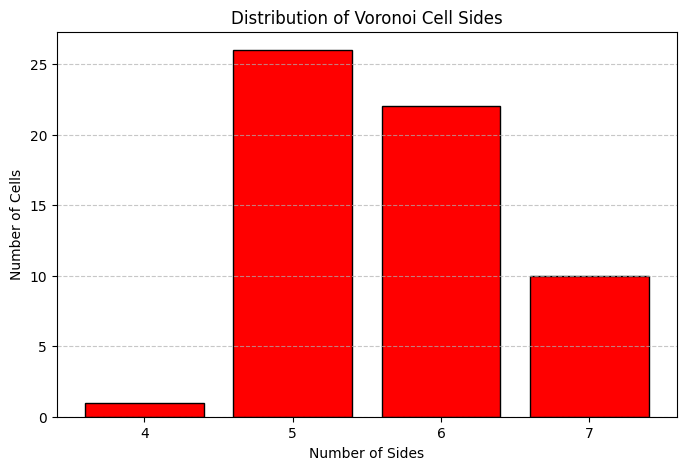

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Construct Graph from Voronoi
graph = nx.Graph()
for i, region in enumerate(vor.regions):
    if -1 in region or len(region) == 0:
        continue
    graph.add_node(i, sides=len(region))

# Extract Number of Hexagonal Cells
hexagonal_cells = [n for n, attr in graph.nodes(data=True) if attr['sides'] == 6]
hexagonality_ratio = len(hexagonal_cells) / len(graph.nodes)

print(f'Hexagonality Ratio: {hexagonality_ratio:.2f}')

# Count the number of cells for each number of sides
side_counts = {}
for n, attr in graph.nodes(data=True):
    sides = attr['sides']
    if sides in side_counts:
        side_counts[sides] += 1
    else:
        side_counts[sides] = 1

# Sort the sides for better visualization
sorted_sides = sorted(side_counts.keys())

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(sorted_sides, [side_counts[s] for s in sorted_sides], color='red', edgecolor='black')
plt.xlabel('Number of Sides')
plt.ylabel('Number of Cells')
plt.title('Distribution of Voronoi Cell Sides')
plt.xticks(sorted_sides)  # Ensure all side numbers are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

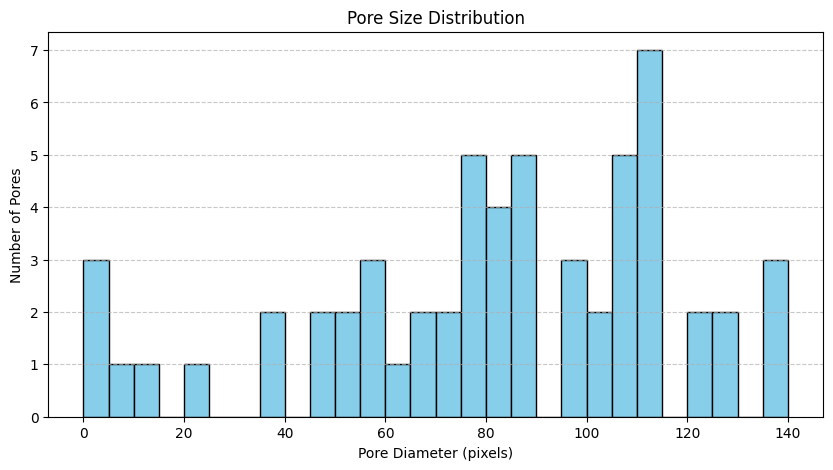

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load SEM Image in Grayscale
image = cv2.imread('sample2A.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Step 1: Preprocess the Image (Thresholding and Cleaning)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Step 2: Find Contours of Pores
contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Calculate Pore Diameters
pore_diameters = []
for contour in contours:
    area = cv2.contourArea(contour)
    equivalent_diameter = 2 * np.sqrt(area / np.pi)  # Diameter of a circle with the same area
    pore_diameters.append(equivalent_diameter)

# Step 4: Bin the Pore Diameters for the Bar Chart
# Define bin edges (adjust based on your pore size range)
bin_edges = np.arange(0, max(pore_diameters) + 5, 5)  # Bins of 5 units (e.g., pixels)
hist, bin_edges = np.histogram(pore_diameters, bins=bin_edges)

# Step 5: Plot the Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(bin_edges[:-1], hist, width=5, align='edge', color='skyblue', edgecolor='black')
plt.xlabel('Pore Diameter (pixels)')
plt.ylabel('Number of Pores')
plt.title('Pore Size Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()